# Logistic Regression application (Task)

#### This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

# step 1 | Data Pre-Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Social_Network_Ads - Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x =dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [4]:
dataset.shape

(400, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


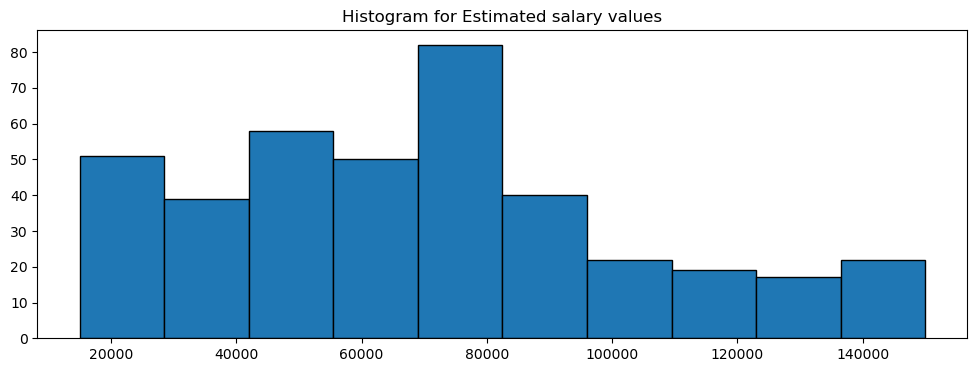

In [6]:
# visulaisation
plt.figure(figsize=(12,4))
plt.title('Histogram for Estimated salary values')
plt.hist(dataset['EstimatedSalary'],bins='sturges',edgecolor='black')
plt.show()
#'sturges' is a method for automatically determining the number of bins in a histogram.
# it is based on sturges formula,which calculates the number of bins as 1+log2(n),where n is the number of data points.

In [7]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# normalize the range of features and prevents certain feature from dominating the learning proess

# Step 2 | Logistic Regression Model

#### The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [10]:
# fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

# Step 3 | Prediction

#### Predicting the test set results

In [11]:
y_pred=classifier.predict(x_test)

In [12]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


# Step 4 | Evaluating The Prediction

#### we predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly.So this confusion matrix is going to contain the correct prediction that our model made on the set as well as the incorrect predictions.

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [14]:
print(classifier.score(x_train,y_train))
y_train_pred=classifier.predict(x_train)

0.8233333333333334


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

# model seems to preform reasonably well,with higher precision and recall for class 0 compared to class 1

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       189
           1       0.82      0.68      0.74       111

    accuracy                           0.82       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.82      0.82      0.82       300



In [16]:
# precision: This tells us how many of the items the model predicted as positive are actually positive
# for class 0, the precision is 0.83, and for class 1, it's 0.82. So, roughly 83% of the items predicted as class 0 are actually class 0,
# and about 82% of the items predicted as class 1 are actually class 1.
#Recall: This indicates how many of the actual positive items the model was able to identify correctly.
#For class 0, the recall is 0.91, and for class 1, it's 0.68. So, about 91% of the actual class 0 items were identified correctly,
# while around 68% of the actual class 1 items were identified correctly.

#Higher F1-scores generally indicate better overall performance

#Macro Average: This is the average of precision, recall, and F1-score across both classes.
# It treats each class equally, without considering class imbalance. In this case, the macro average precision, recall, and F1-score are

#weighted avg: It considers class imbalance by giving more weight to the classes with more instances.
# In this case, the weighted average precision, recall, and F1-score are all around 0.82.

#For class 0, the support value is 189. This means that there are 189 instances in the dataset that are labeled as class 0.
#For class 1, the support value is 111. This means that there are 111 instances in the dataset that are labeled as class 1.